In [93]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
from IPython.display import Audio
from IPython.display import display, Markdown

In [94]:
sourceFilesPrefix="ExpectedResults//music-"

rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")

In [95]:
def sigmoid(y):
    g=np.divide(1,np.add(1,np.exp(-y)))
    return g

def gradient(eta, Y, W):
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    return grad

# First input signal \( music \)

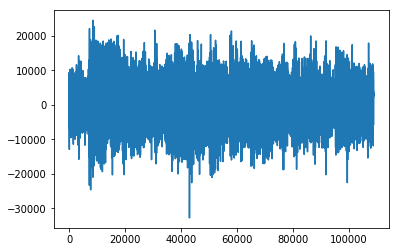

In [96]:
display(Markdown("# First input signal \( music \)"))
plt.figure()
plt.plot(sample1_data)
plt.show()
Audio(data=sample1_data, rate=16000)

# Second input signal \( english voice \)

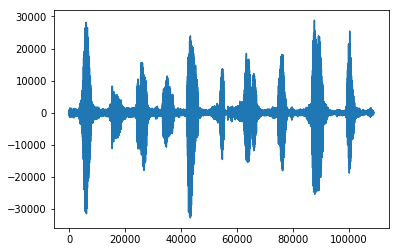

In [97]:
display(Markdown("# Second input signal \( english voice \)"))
plt.figure()
plt.plot(sample2_data)
plt.show()
Audio(data=sample2_data, rate=16000)

In [98]:
med1=sample1_data.std(axis=0)
s1data= sample1_data/med1
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2
orig=np.matrix([s1data,s2data])

print("Correlation coefficient - original data \n" + str(np.corrcoef(orig)))

n=len(orig)
#A=np.random.random([n,n])
A=np.matrix([[0.15270211,0.08406566],
             [0.90514896,0.53725471]])
print("Mixing matrix: \n"+str(A))

X=np.dot(A,orig)
print("Correlation coefficient - mixed data \n" + str(np.corrcoef(X)))

Correlation coefficient - original data 
[[  1.00000000e+00  -1.67506095e-04]
 [ -1.67506095e-04   1.00000000e+00]]
Mixing matrix: 
[[ 0.15270211  0.08406566]
 [ 0.90514896  0.53725471]]
Correlation coefficient - mixed data 
[[ 1.          0.99947426]
 [ 0.99947426  1.        ]]


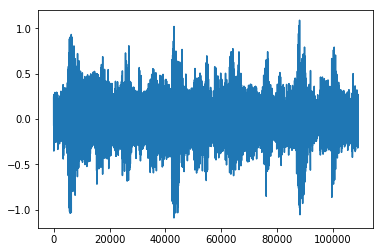

In [99]:
plt.figure()
plt.plot(X[0].T)
plt.show()

In [100]:
Audio(data=X[0], rate=16000)

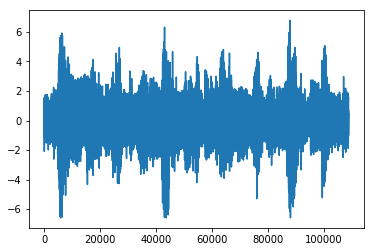

In [101]:
plt.figure()
plt.plot(X[1].T)
plt.show()

In [102]:
Audio(data=X[1], rate=16000)

In [103]:
corr=1
while abs(corr)>=4e-6:
    eta=0.01
    eta0=eta
    T=1000
    num_iter=10000
    W=np.random.uniform(0.001,0.01,(n,n))
    print("Initial guessed decomposition matrix: \n"+str(W))
    for i in range(0,num_iter):
        Y=np.dot(W,X)
        delW=gradient(eta,Y,W)
        W+=delW
        eta=eta0/(1+(i/T))
    Y2=np.dot(W,X)
    corr=np.corrcoef(Y2)[1][0]
    print('Correlation coefficient: \n',corr)

Initial guessed decomposition matrix: 
[[ 0.00497881  0.00190331]
 [ 0.00783162  0.00845022]]
Correlation coefficient: 
 -8.79581157736e-06
Initial guessed decomposition matrix: 
[[ 0.00682013  0.00731107]
 [ 0.00873987  0.00692996]]
Correlation coefficient: 
 -4.48410253983e-06
Initial guessed decomposition matrix: 
[[ 0.0063711   0.00566613]
 [ 0.00293186  0.00682548]]
Correlation coefficient: 
 -5.02834130853e-06
Initial guessed decomposition matrix: 
[[ 0.00339935  0.00297433]
 [ 0.00292067  0.0019615 ]]
Correlation coefficient: 
 -6.834287002e-06
Initial guessed decomposition matrix: 
[[ 0.0082484   0.00104371]
 [ 0.00895033  0.00651498]]
Correlation coefficient: 
 -8.78470057157e-06
Initial guessed decomposition matrix: 
[[ 0.00965579  0.0012944 ]
 [ 0.00831308  0.00867059]]
Correlation coefficient: 
 -8.79279186825e-06
Initial guessed decomposition matrix: 
[[ 0.00376486  0.00128274]
 [ 0.00273937  0.00816131]]
Correlation coefficient: 
 -8.76456299134e-06
Initial guessed decomp

In [104]:
print('Final decomposition matrix: \n',W)
Y2=np.dot(W,X)

Final decomposition matrix: 
 [[-0.65195435  0.10998943]
 [ 0.38726791 -0.06059924]]


# First recovered signal

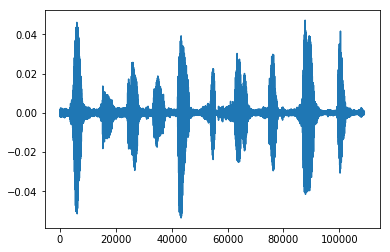

In [105]:
display(Markdown("# First recovered signal"))
plt.figure()
plt.plot(Y2[0].T)
plt.show()
Audio(data=Y2[0], rate=16000)

# Second recovered signal

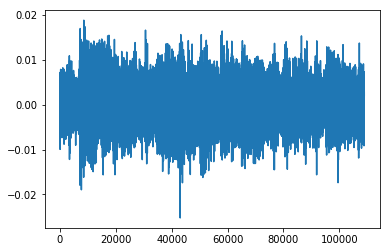

In [106]:
display(Markdown("# Second recovered signal"))
plt.figure()
plt.plot(Y2[1].T)
plt.show()
Audio(data=Y2[1], rate=16000)